# Python Data Science & NLP Cheat Sheet

In [156]:
#!pip install eli5 #feature importance report. explain like i'm 5

In [ ]:
#import warnings
%matplotlib inline 
#warnings.filterwarnings('ignore')
#import operator
#from IPython.display import display, HTML
#import matplotlib.pyplot as plt

In [137]:
# all sklearn stuff.... || sklearn packages || tfidf || data split || classifier || evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.csr import csr_matrix  # for saving tfidf_matrix only
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

# some more libs for pipeline
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [263]:
from flair.data import Sentence
import torch

In [1]:
# python/pandas/numpy/torch/keras/flair/nlp packs/.and more!
# all var name starting with an underscore _ is the intermediate var that is for display purpose only.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score

In [3]:
import pandas as pd
import numpy as np
from collections import Counter

In [9]:
## A toy df for demonstration purpose: fake twitter user dataset
# lv2cat is the sub category of lv1cat 
# s1,s2 some scores, s1 (0,1) s2 [-1,1]
# op some opinion towards something

df = pd.read_csv('toy_dataset.csv')
df

,id,sex,group,age,s1,s2,party,lv1cat,lv2cat,text,op,ts
0,q3gh,m,l,16,0.89,0.29,blue,a,a1,"Awww, that's a bummer",yes,2019/4/5
1,p35h,f,l,23,0.82,-0.87,red,a,a1,might cry as a result School today also. Blah!,no,2019/4/5
2,l8r456,m,o,40,0.05,0.56,blue,a,a2,I dived many times for the ball,yes,2019/4/7
3,dty2,f,n,27,0.78,-0.47,red,a,a2,my whole body feels itchy and like its on fire,no,2019/4/8
4,2n8n2,f,o,38,0.17,-0.70,blue,b,b1,it's not behaving at all.,maybe,2019/4/11
5,1d51,m,n,64,0.32,0.34,blue,b,b2,i'm mad.,yes,2019/4/10
6,1bu6un,f,n,55,0.38,-0.37,blue,b,b3,why am i here?,yes,2019/4/17
7,sr57h,m,h,32,0.25,0.95,blue,b,b3,not the whole crew,no,2019/4/16
8,78uvg,m,l,19,0.31,0.22,red,b,b3,Need a hug,yes,2019/4/18
9,er5xdt,f,o,21,0.13,-0.16,blue,c,c1,hey long time no see!,no,2019/4/10


In [ ]:
# some sentiment libs (weak lib textblob (rule based, also support Naivebaysian), vader(better rule based))
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob("I love this library", analyzer=NaiveBayesAnalyzer())
blob.sentiment

In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
def predict_vader(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    return sid.polarity_scores(sentence)['compound']
predict_vader('bright')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yue/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0.4404

In [3]:
# flair sentiment # need colab...# local environment issues..
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence('Flair is pretty neat!')
classifier.predict(sentence)
# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

2021-03-13 10:08:39,692 loading file /Users/yue/.flair/models/sentiment-en-mix-distillbert_3.1.pt


ModuleNotFoundError: No module named 'transformers.modeling_distilbert'

In [249]:
# named entity recognition || NER

from flair.models import SequenceTagger
from flair.data import Sentence

tagger = SequenceTagger.load('ner')

sentence = Sentence('George Washington went to Washington .')

# predict NER tags
tagger.predict(sentence)

# print sentence with predicted tags
print(sentence.to_tagged_string())

2021-03-04 09:49:10,337 loading file /Users/yue/.flair/models/en-ner-conll03-v0.4.pt
George <B-PER> Washington <E-PER> went to Washington <S-LOC> .


In [250]:
print(sentence.to_dict(tag_type='ner'))
# more on flair text tagger: https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_2_TAGGING.md

{'text': 'George Washington went to Washington .', 'labels': [], 'entities': [{'text': 'George Washington', 'start_pos': 0, 'end_pos': 17, 'labels': [PER (0.9968)]}, {'text': 'Washington', 'start_pos': 26, 'end_pos': 36, 'labels': [LOC (0.9994)]}]}


In [10]:
# filter data entries by "or"ing 2 conditions. # two conditions || extract data select data || multiple columns
#df.loc[(df.sex == 'm') | (df.age >= 55)]
# filter data entries by "and"ing 2 conditions.
df.loc[(df.sex == 'm') & (df.op == 'yes')]

,id,sex,group,age,s1,s2,party,lv1cat,lv2cat,text,op,ts
0,q3gh,m,l,16,0.89,0.29,blue,a,a1,"Awww, that's a bummer",yes,2019/4/5
2,l8r456,m,o,40,0.05,0.56,blue,a,a2,I dived many times for the ball,yes,2019/4/7
5,1d51,m,n,64,0.32,0.34,blue,b,b2,i'm mad.,yes,2019/4/10
8,78uvg,m,l,19,0.31,0.22,red,b,b3,Need a hug,yes,2019/4/18
14,kj76,m,l,28,0.54,-0.67,blue,d,d1,never talk to me anymore,yes,2019/4/20
18,h9io8u,m,l,22,0.48,-0.66,red,d,d3,is there any thing new,yes,2019/4/9
19,3ggjko,m,l,20,0.95,0.97,red,d,d4,respect!,yes,2019/4/9


In [11]:
# seaborn tricks || style || grid || 
import seaborn as sns
sns.set_theme(style="whitegrid")

#sns.set(rc={'figure.figsize':(14,6)})

In [265]:
# sentence embeddings || sentence similarity || torch || flair
# bert+flair sentence embedding || colab only :
# ------------------- # ---------------------# ------------------------------------##
#!pip install flair
#!pip install sentence-transformers
#from flair.embeddings import SentenceTransformerDocumentEmbeddings
# init embedding
#embedding_bert = SentenceTransformerDocumentEmbeddings('bert-base-nli-mean-tokens')
# ------------------- # ---------------------# ------------------------------------## 
from flair.data import Sentence
import torch
# how every using glove + pooling / RNN is ez at local PC:
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings, DocumentRNNEmbeddings
glove_embedding = WordEmbeddings('glove')
embedding_glove_pool = DocumentPoolEmbeddings([glove_embedding]) # better and simple 
embedding_glove_rnn = DocumentRNNEmbeddings([glove_embedding]) # too much weight on the last few words.

# create a sentence
s1 = Sentence('The grass is green .')
s2 = Sentence('I like the trees .')

# embed the sentence
embedding_glove_pool.embed([s1,s2])

# torch cos similarity: notice the dim = 0 here.
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
score = cos(s1.embedding, s2.embedding) 
print(score)
# notice this socre is a "torch tensor obj", to get the values, use score.item() 
#(then you get a numpy array and then can do mean, sum, etc...with numpy methods you know about...)

I0309 10:35:23.337666 4531738048 utils.py:421] loading Word2VecKeyedVectors object from /Users/yue/.flair/embeddings/glove.gensim
I0309 10:35:24.329643 4531738048 utils.py:459] loading vectors from /Users/yue/.flair/embeddings/glove.gensim.vectors.npy with mmap=None
I0309 10:35:24.438076 4531738048 utils.py:490] setting ignored attribute vectors_norm to None
I0309 10:35:24.439178 4531738048 utils.py:427] loaded /Users/yue/.flair/embeddings/glove.gensim


tensor(0.9122)


In [64]:
# merge two dictionary || combine two dictionary || merge keys of dictionary (and sum the values)
# warning: only "positive" count works. otherwise kv pair will not be in the new dict. (may be useful ...)
d1 = {'a':3,'b':4,'c':2};d2 = {'a':1,'b':5,'c':-3} 
A = Counter(d1);B = Counter(d2)
merged_d1d2 = A + B 
merged_d1d2 # c is dropped

Counter({'a': 4, 'b': 9})

In [ ]:
# iterate rows
for index, row in df.iterrows():
        print(index, row[])
        # do something on the index / rows        

In [65]:
# iterate diction k v item
for k,v in d1.items():
    print(k,'->',v)

a -> 3
b -> 4
c -> 2


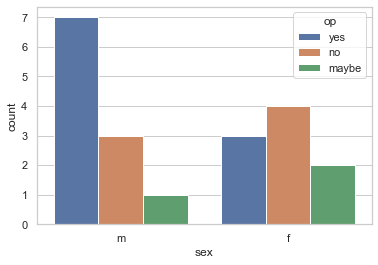

In [12]:
# bar plot || multiple columns || contrast || hue 
# look at a certain attribute of a category x - how the "hue" behave differently
# e.g. how the op differ (distribute) in m and f (sex attributes)
# notice this is a "countplot"
ax = sns.countplot(x="sex", hue="op", data=df)

In [27]:
# but how to get the percentage of the above fig? seaborn has no way to do it atm. however,
# we can...manually..make an extra table by calculating the percentage...
# step 1 get count by multi lv groupby
#df.groupby(['sex', 'op']).agg({'sales': 'sum'})
_efio = df.groupby(['sex', 'op'])[['id']].count()
_efio

id
sex op       
f   maybe   2
    no      4
    yes     3
m   maybe   1
    no      3
    yes     7

In [30]:
# step 2 get percentage by mapping over sum
_aerh = _efio.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
_aerh

,sex,op,id
0,f,maybe,22.222222
1,f,no,44.444444
2,f,yes,33.333333
3,m,maybe,9.090909
4,m,no,27.272727
5,m,yes,63.636364


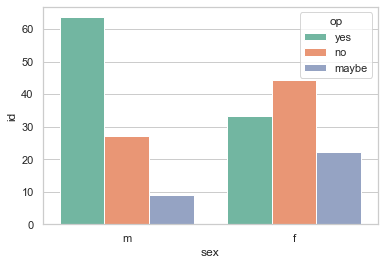

In [38]:
# step 3: using seaborn barplot! sometimes to be consistant have to specify order and hue order :
ax = sns.barplot(x="sex", y="id", hue="op", order = ['m','f'], hue_order = ['yes','no','maybe'], data=_aerh, palette="Set2")

In [39]:
# related task: get the statistics (sum/avg/mean/) of a column by multiple level groubby!!wow!
df.groupby(['sex', 'op']).agg({'s1': 'mean'})

s1
sex op             
f   maybe  0.130000
    no     0.562500
    yes    0.480000
m   maybe  0.450000
    no     0.203333
    yes    0.505714

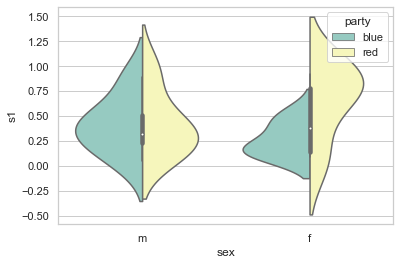

In [41]:
# violin plot with hue !There must be exactly two hue levels to use `split`.'
# how s1 score distribute..differently in different parties ... by m and f
ax = sns.violinplot(x="sex", y="s1", hue="party",
                    data=df, palette="Set3", scale="count", split=True)

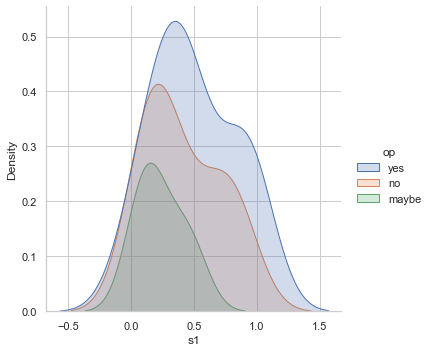

In [42]:
# kde kernel distribute estimation
sns.displot(df, x="s1", hue="op", kind="kde", fill=True,)

In [48]:
# above, if data point is toooo many sample in groups
df.groupby('op').apply(lambda x: x.sample(3,replace=True))
#df.sample(n=20000,random_state = 12) # more generally the methods...

#related task:
import random
content = ['a','b','c']
random.sample(content, 2) # random sample items from a list

id sex group  age    s1    s2 party lv1cat lv2cat  \
op                                                                
maybe 15   32rfg   m     n   29  0.45  0.07  blue      d     d1   
      4    2n8n2   f     o   38  0.17 -0.70  blue      b     b1   
      15   32rfg   m     n   29  0.45  0.07  blue      d     d1   
no    17  wx3e45   m     o   23  0.22 -0.40   red      d     d2   
      1     p35h   f     l   23  0.82 -0.87   red      a     a1   
      12   vbrte   f     l   35  0.52 -0.99  blue      c     c2   
yes   8    78uvg   m     l   19  0.31  0.22   red      b     b3   
      18  h9io8u   m     l   22  0.48 -0.66   red      d     d3   
      8    78uvg   m     l   19  0.31  0.22   red      b     b3   

                                                    text     op         ts  
op                                                                          
maybe 15                                   it is amazing  maybe  2019/4/15  
      4                        it's not behaving at all.  maybe  2019/4/11  
      15                                   it is amazing  maybe  2019/4/15  
no    17                                   I am confused     no  2019/4/12  
      1   might cry as a result School today also. Blah!     no   2019/4/5  
      12      spring break in plain city... it's snowing     no  2019/4/23  
yes   8                                       Need a hug    yes  2019/4/18  
      18                          is there any thing new    yes   2019/4/9  
      8                                       Need a hug    yes  2019/4/18

In [ ]:
# strange melt function (pivot/unpivot)
#This function is useful to massage a DataFrame into a format 
# where one or more columns are identifier variables (id_vars), 
# while all other columns, considered measured variables (value_vars), 
# are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

melted = pd.melt(df, id_vars=["weekday"], 
             var_name="Person", value_name="Score")

#we use melt to transform wide data to long data.

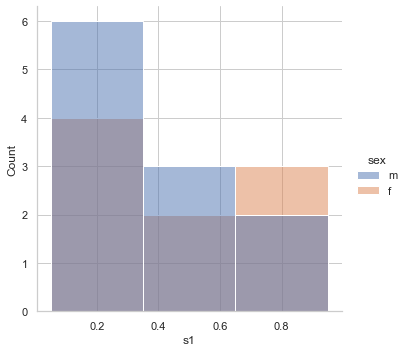

In [47]:
# distribution plot (displot)
sns.displot(df, x="s1", bins=3,hue="sex")

In [ ]:
# pandas pd to html (need to work with print())
#print(df.to_html())

In [ ]:
# an example of 
# || reading json || create || bash file || how to run bash file
#./Urs.py -r wallstreetbets t 100 day --json

import pandas as pd

apath = '/Users/yue/Downloads/URS-master/scrapes/02-23-2021/r-wallstreetbets-Top-100-results-past-day.json'

d = pd.read_json(apath,orient = 'index')

#./Urs.py -c [URL] 100 --json
num = 30
for i in d['URL'][:3]:
    print('https://www.reddit.com/'+i)

with open ('comments_run.sh', 'w') as rsh:
    rsh.write('#! /bin/bash\n')
    for i in d['URL']:
        #print('https://www.reddit.com/'+i)
        c = './Urs.py -c '+'https://www.reddit.com'+i+' 30 --json'
        rsh.write(c+'\n')

    

#%%bash
#chmod +x comments_run.sh
#./comments_run.sh

In [ ]:
# load json as dictionary
import json
fn='some address...'
with open(fn) as f:
  data = json.load(f)

# Output: {'name': 'Bob', 'languages': ['English', 'Fench']}
print(data)

In [ ]:
# write to txt
with open('afile.txt', 'w') as f:
    for item in lst:
        f.write("%s\n" % item)

In [ ]:
# read from txt
with open('afile.txt', 'r') as f:
    content = f.readlines()
content = [x.strip() for x in content] 

In [ ]:
# text cleaning package || news || regular expression || pattern || tokenization || lemmatization 

import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer



def clean_reuters(s):
    s1 = re.sub(r"^[^-]*\(Reuters\)\ \-\ ", "", s) # remove infor before "reuters -"
    s2 = re.sub(r"\(Reporting[^-]*\)", "", s1) #remove (Reporting by someone)
    s3 = re.sub(r"\(Editing[^-]*\)", "", s2)# remove(Editing by someone)
    s4 = re.sub(r"\[ID:[^]]*\]", "",s3) #remove [ID:...]
    s5 = re.sub(r"[+-]?([0-9]+([.][0-9]*)?|[.][0-9]+)|(?:(?<=,)|(?<=^))[+-]?\d+\.?\d*(?:E[+-]?\d+)?(?=,|$)", "<NUM>",s4) #replace number with <NUM>
    return s5


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word == 'num':
            new_words.append('<NUM>')
        elif ('.L' in word) or ('.O' in word):
            new_words.append(word)
        else:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        if ('.L' in word) or ('.O' in word) or ('<NUM>' in word):
            new_words.append(word)
        else:
            new_word = word.lower()
            new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if ('.L' in word) or ('.O' in word) or ('<NUM>' in word):
            new_words.append(word)
        else:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words



def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas



def normalize(words):
    
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    #words = replace_numbers(words)
    words = remove_stopwords(words)
    return words



def cleaner_wrapper(string,out = 'string'):
    
    words = nltk.word_tokenize(clean_reuters(string))
    words = normalize(words)
    
    if out == 'string':
        return " ".join(words)
    return words

In [ ]:
# get file names in the current directory || path || filenames 
import os
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    if 'csv' in f:
        print (f)

In [ ]:
# rename columns (chainable)
#some_df.rename(columns={'financial': 'financials', 'tech': 'technology'}, inplace=True) 
# but need a dict

In [52]:
# drop a column || axis = 1
#df.drop('s1',axis=1)


In [55]:
# sort values by column(s)
df.sort_values(by = ['s1'],ascending = False).head(3)

,id,sex,group,age,s1,s2,party,lv1cat,lv2cat,text,op,ts
19,3ggjko,m,l,20,0.95,0.97,red,d,d4,respect!,yes,2019/4/9
13,3e4hkj,f,h,26,0.92,0.79,red,d,d1,I couldn't bear to watch it.,yes,2019/4/23
0,q3gh,m,l,16,0.89,0.29,blue,a,a1,"Awww, that's a bummer",yes,2019/4/5


In [61]:
# drop duplicates | dropna | any | all | subset 
df2 = pd.read_csv('dup_na_toy.csv')
df2

,id,v1,v2,t1
0,p35h,15.0,20.0,apple
1,l8r456,NaN,NaN,bananas
2,sr57h,76.0,12.0,bear
3,kljiv0,3.0,NaN,dear
4,kj76,NaN,21.0,deer
5,kljiv0,3.0,NaN,dear
6,p35h,15.0,NaN,apple


In [57]:
df2.drop_duplicates(['id'])

,id,v1,v2,t1
0,p35h,15.0,20.0,apple
1,l8r456,NaN,NaN,bananas
2,sr57h,76.0,12.0,bear
3,kljiv0,3.0,NaN,dear
4,kj76,NaN,21.0,deer


In [59]:
df2.drop_duplicates(['id']).dropna(how='all',subset = ['v1','v2'])

,id,v1,v2,t1
0,p35h,15.0,20.0,apple
2,sr57h,76.0,12.0,bear
3,kljiv0,3.0,NaN,dear
4,kj76,NaN,21.0,deer


In [60]:
df2.drop_duplicates(['id']).dropna(how='any',subset = ['v1','v2'])

,id,v1,v2,t1
0,p35h,15.0,20.0,apple
2,sr57h,76.0,12.0,bear


In [86]:
# general cleaning
from datetime import datetime # be careful!

# 1. datetime convert and sort by datetime ( so remove duplicate and keep the first published one)
# example 1 datetime convert

date_string = "21 June, 2018"

print("date_string =", date_string)
print("type of date_string =", type(date_string))

date_object = datetime.strptime(date_string, "%d %B, %Y")

print("date_object =", date_object)
print("type of date_object =", type(date_object))

date_string = 21 June, 2018
type of date_string = <class 'str'>
date_object = 2018-06-21 00:00:00
type of date_object = <class 'datetime.datetime'>


In [87]:
# e.g. 2 datetime || more example + placeholder meaning: 
# https://www.programiz.com/python-programming/datetime/strptime
dt_string = "12/11/2018 09:15:32"

# Considering date is in dd/mm/yyyy format
dt_object1 = datetime.strptime(dt_string, "%d/%m/%Y %H:%M:%S")
print("dt_object1 =", dt_object1)

# Considering date is in mm/dd/yyyy format
dt_object2 = datetime.strptime(dt_string, "%m/%d/%Y %H:%M:%S")
print("dt_object2 =", dt_object2)

dt_object1 = 2018-11-12 09:15:32
dt_object2 = 2018-12-11 09:15:32


In [95]:
def dt_convert(s):
    # s : datetime like string
    #s = "".join(s.split('/')[0:2]).strip(' '), # clean text here
    #pattern = '%B %d, %Y  %I:%M %p' # change pattern here
    pattern = '%Y/%m/%d'
    try:
        dt_obj = datetime.strptime(s, pattern)
    except:
        print('convert failed')
        dt_obj = None
    return dt_obj
    
def sort_df_by_time(df,col,drop = True):
    df['datetime'] = df[col].map(lambda x : dt_convert(str(x)))
    if drop:
        return df.sort_values(by = ['datetime']).drop(col,axis=1)
    return df.sort_values(by = ['datetime'])
    

# # one hot some column(s)

def multi_tag_one_hot(df,col):
    # Get one hot encoding of columns col
    t1 = pd.get_dummies(df[col])
    # Drop column col as it is now encoded
    t2 = df.drop(col,axis = 1)
    # Join the encoded df
    t3 = t2.join(t1)
    
    return t3
    

In [96]:
dt_convert(df['ts'][0])

datetime.datetime(2019, 4, 5, 0, 0)

In [98]:
sort_df_by_time(df,'ts').head()

,id,sex,group,age,s1,s2,party,lv1cat,lv2cat,text,op,datetime
0,q3gh,m,l,16,0.89,0.29,blue,a,a1,"Awww, that's a bummer",yes,2019-04-05
1,p35h,f,l,23,0.82,-0.87,red,a,a1,might cry as a result School today also. Blah!,no,2019-04-05
2,l8r456,m,o,40,0.05,0.56,blue,a,a2,I dived many times for the ball,yes,2019-04-07
3,dty2,f,n,27,0.78,-0.47,red,a,a2,my whole body feels itchy and like its on fire,no,2019-04-08
18,h9io8u,m,l,22,0.48,-0.66,red,d,d3,is there any thing new,yes,2019-04-09


In [73]:
multi_tag_one_hot(df,['sex','group']).head()

,id,age,s1,s2,party,lv1cat,lv2cat,text,op,ts,sex_f,sex_m,group_h,group_l,group_n,group_o
0,q3gh,16,0.89,0.29,blue,a,a1,"Awww, that's a bummer",yes,2019/4/5,0,1,0,1,0,0
1,p35h,23,0.82,-0.87,red,a,a1,might cry as a result School today also. Blah!,no,2019/4/5,1,0,0,1,0,0
2,l8r456,40,0.05,0.56,blue,a,a2,I dived many times for the ball,yes,2019/4/7,0,1,0,0,0,1
3,dty2,27,0.78,-0.47,red,a,a2,my whole body feels itchy and like its on fire,no,2019/4/8,1,0,0,0,1,0
4,2n8n2,38,0.17,-0.70,blue,b,b1,it's not behaving at all.,maybe,2019/4/11,1,0,0,0,0,1


In [102]:
# is English character?
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

print(isEnglish('slabiky, ale liší se podle významu'))
print(isEnglish('English'))
#assert not isEnglish('ގެ ފުރަތަމަ ދެ އަކުރު ކަ')
#assert not isEnglish('how about this one : 通 asfަ')
#assert isEnglish('?fd4))45s&')

False
True


In [103]:
# return sentence length.
def get_n_words(s):
    return len(s.split(' '))
get_n_words('I like python')

3

In [105]:
# if the function is simple -- no need lambda x : f(x) 
# map single column
df['length'] = df['text'].map(get_n_words)
df.head()

,id,sex,group,age,s1,s2,party,lv1cat,lv2cat,text,op,ts,datetime,length
0,q3gh,m,l,16,0.89,0.29,blue,a,a1,"Awww, that's a bummer",yes,2019/4/5,2019-04-05,4
1,p35h,f,l,23,0.82,-0.87,red,a,a1,might cry as a result School today also. Blah!,no,2019/4/5,2019-04-05,9
2,l8r456,m,o,40,0.05,0.56,blue,a,a2,I dived many times for the ball,yes,2019/4/7,2019-04-07,7
3,dty2,f,n,27,0.78,-0.47,red,a,a2,my whole body feels itchy and like its on fire,no,2019/4/8,2019-04-08,10
4,2n8n2,f,o,38,0.17,-0.70,blue,b,b1,it's not behaving at all.,maybe,2019/4/11,2019-04-11,5


(3, 8)

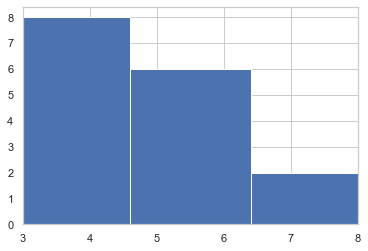

In [109]:
a = df['length'].hist(bins =5,)
import matplotlib.pyplot as plt
# set axis limit 
a.set_xlim((3,8))

In [112]:
# loc data within a range || between || inclusive
df[df['length'].between(2,6)].head()

,id,sex,group,age,s1,s2,party,lv1cat,lv2cat,text,op,ts,datetime,length
0,q3gh,m,l,16,0.89,0.29,blue,a,a1,"Awww, that's a bummer",yes,2019/4/5,2019-04-05,4
4,2n8n2,f,o,38,0.17,-0.70,blue,b,b1,it's not behaving at all.,maybe,2019/4/11,2019-04-11,5
5,1d51,m,n,64,0.32,0.34,blue,b,b2,i'm mad.,yes,2019/4/10,2019-04-10,2
6,1bu6un,f,n,55,0.38,-0.37,blue,b,b3,why am i here?,yes,2019/4/17,2019-04-17,4
7,sr57h,m,h,32,0.25,0.95,blue,b,b3,not the whole crew,no,2019/4/16,2019-04-16,4


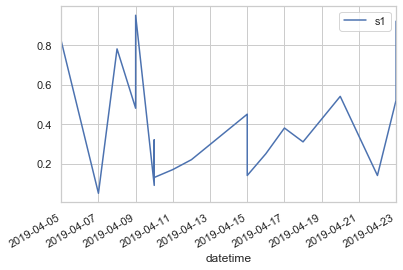

In [113]:
# plot || time series simple
df.plot(x='datetime', y='s1')

In [115]:
# but what if multiple records in a same day / time period / interval?
df.groupby('datetime').mean().reset_index().head()

,datetime,age,s1,s2,length
0,2019-04-05,19.500000,0.855,-0.290000,6.500000
1,2019-04-07,40.000000,0.050,0.560000,7.000000
2,2019-04-08,27.000000,0.780,-0.470000,10.000000
3,2019-04-09,21.000000,0.715,0.155000,3.000000
4,2019-04-10,42.666667,0.180,0.346667,3.666667


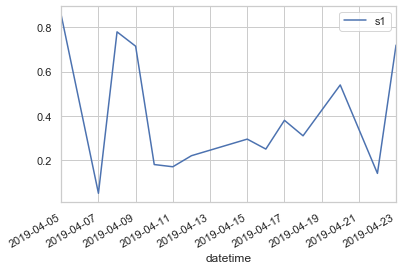

In [116]:
df.groupby('datetime').mean().reset_index().plot(x='datetime', y='s1')

In [1]:
# third party but yahoo financial api
# Install yfinance package.
#!pip install yfinance
# Import yfinance
import yfinance as yf  
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
data = yf.download('DJI','2010-11-01','2020-05-20')

[*********************100%***********************]  1 of 1 completed


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-01,11124.599609,11124.599609,11124.599609,11124.599609,11124.599609,0
2010-11-02,11188.700195,11188.700195,11188.700195,11188.700195,11188.700195,0
2010-11-03,11215.099609,11215.099609,11215.099609,11215.099609,11215.099609,0
2010-11-04,11434.799805,11434.799805,11434.799805,11434.799805,11434.799805,0
2010-11-05,11444.099609,11444.099609,11444.099609,11444.099609,11444.099609,0
...,...,...,...,...,...,...
2020-05-13,23248.000000,23248.000000,23248.000000,23248.000000,23248.000000,0
2020-05-14,23625.300781,23625.300781,23625.300781,23625.300781,23625.300781,0
2020-05-15,23685.400391,23685.400391,23685.400391,23685.400391,23685.400391,0


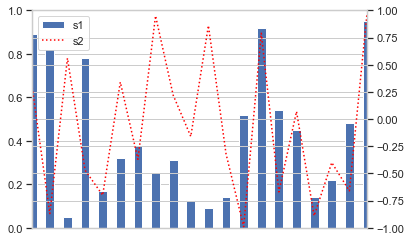

In [117]:
# a less common lay over of two figures ( a bar and a plot) || overlay || overlap
plt.figure()
#plt.xlabel('trend in trends')

ax1 = df['s1'].plot(kind='bar')
ax2 = df['s2'].plot(color='red', grid=True, linestyle="dotted",secondary_y=True, label='s2')

ax1.set_ylim([0,1])
ax2.set_ylim([-1,1])

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

xxx = plt.legend(h1+h2, l1+l2, loc=2)

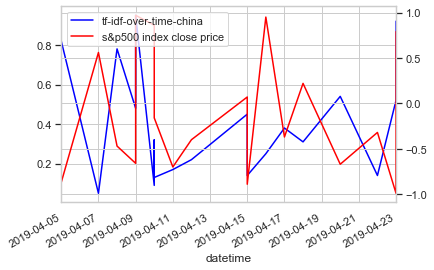

In [178]:
# overlay two trend plot time series
#plt.figure(figsize=(12,5))
plt.xlabel('2 trends')

ax1 = df.set_index('datetime').s1.plot(color='blue', grid=True, label='tf-idf-over-time-china')
ax2 = df.set_index('datetime').s2.plot(color='red', grid=True, secondary_y=True, label='s&p500 index close price')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [ ]:
#import pandas as pd
# concate two dfs horiz
df1 = pd.DataFrame({
    'A': [1,2,3,4,5],
    'B': [1,2,3,4,5]
})

df2 = pd.DataFrame({
    'C': [1,2,3,4,5],
    'D': [1,2,3,4,5]
})

df_concat = pd.concat([df1, df2], axis=1)

print(df_concat)

In [179]:
# auto correlation
def autocorr_by_hand(x, lag):
    # Slice the relevant subseries based on the lag
    y1 = x[:(len(x)-lag)]
    y2 = x[lag:]
    # Subtract the subseries means
    sum_product = np.sum((y1-np.mean(y1))*(y2-np.mean(y2)))
    # Normalize with the subseries stds
    return sum_product / ((len(x) - lag) * np.std(y1) * np.std(y2))
autocorr_by_hand(df.s1,2)

0.7198981135681255

In [ ]:
# plot as many as you want
plt.figure()
#plt.xlabel('trend in trends')

ax1 = na.coronavirus[-12:].plot(color='blue',linestyle="dotted", grid=True, label='"coronavirus"')
ax1 = na.lockdown[-12:].plot(color='yellow',linestyle="dashdot", grid=True, label='"lockdown"')
ax1 = na.pandemic[-12:].plot(color='cyan', linestyle="dashed", grid=True, label='"pandemic"')
ax2 = na.Close[-12:].plot(color='red', grid=True, secondary_y=True, label='S&P 500 Index')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

x_axis = ax1.axes.get_xaxis()
x_axis.label.set_visible(False)

xxx = plt.legend(h1+h2, l1+l2, loc=4)

In [159]:
# sklearn pipeline ||
# step 1: make sure data type
raw = pd.read_csv('MLpipe.csv').drop(['passenger_id','name','ticket','body','home.dest'],axis=1)
# convert column "a" to int64 dtype and "b" to complex type
raw = raw.astype({"pclass": 'category', "sex": 'category'})
raw.dtypes # get type info for all columns || types
# change column data type
#https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

pclass      category
sex         category
age          float64
sibsp          int64
parch          int64
fare         float64
cabin         object
embarked      object
boat          object
survived       int64
dtype: object

In [160]:
raw.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat,survived
0,3,female,NaN,0,0,7.7333,NaN,Q,13,1
1,3,male,38.0,0,0,8.6625,NaN,S,NaN,0
2,3,female,30.0,1,1,24.1500,NaN,S,NaN,0
3,2,female,54.0,1,3,23.0000,NaN,S,4,1
4,2,male,40.0,0,0,13.0000,NaN,S,NaN,0


In [161]:
# step2: train test split
X_train, X_test, y_train, y_test = train_test_split(raw.drop('survived',axis=1), raw.survived, test_size=0.2)

In [162]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat
704,3,female,36.0,1,0,17.4000,NaN,S,13
92,3,male,18.0,0,0,8.6625,NaN,S,NaN
126,2,female,18.0,0,2,13.0000,NaN,S,16
313,2,male,34.0,0,0,13.0000,NaN,S,NaN
140,1,male,NaN,0,0,0.0000,NaN,S,NaN


In [163]:
y_train.head()

704    1
92     0
126    1
313    0
140    0
Name: survived, dtype: int64

In [164]:
# step3: build proprocessor. (numerical preprocessor for numerical data type, categorical for categorical, etc.)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # simple multiple functional fill na with stragegy
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [167]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
print(numeric_features)
categorical_features = X_train.select_dtypes(include=['object','category']).columns
print(categorical_features)

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Index(['age', 'sibsp', 'parch', 'fare'], dtype='object')
Index(['pclass', 'sex', 'cabin', 'embarked', 'boat'], dtype='object')


In [148]:
import eli5

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



Bagging and RFs try to create multiple representative data sets, and then predict 
the average of the models trained on these data sets. 
This process is exactly what you want to do if you want to minimize the variance & overfitting of your model class,
but does nothing about minimizing bias. On the other hand, 
Boosting surgically manipulates the training set to focus on areas of high error. 
This is exactly what you’d do if you worry about your model class having high bias 
and being unable to globally model the data distribution well. 
However, Boosting itself ignores the overfitting issue. So when you **use Bagging & RFs**, 
try to use *high variance & low bias models* (**to "avoid overfitting**). Conversely, 
when you use Boosting, try to use low variance & high bias models (**to model the data pattern with especially difficult examples).


In [168]:
# step3: pack models and output model performance evaluation
classifiers = [
    #KNeighborsClassifier(3),
    #SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    #DecisionTreeClassifier(),
    RandomForestClassifier(),
    #AdaBoostClassifier(),
    #GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    ##### for feature for eli5
    onehot_columns = list(pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=categorical_features))
    numeric_features_list = list(numeric_features)
    numeric_features_list.extend(onehot_columns)
    
    ####
    print("model score: %.3f" % pipe.score(X_test, y_test))
    predicted = pipe.predict(X_test)
    #print('acc:',accuracy_score(y_test, predicted)) the "pipe.score" is actually the accuracy score
    #print("Classification report for classifier %s:\n%s\n" % (pipe, metrics.classification_report(y_test, predicted)))
    print('f1:',f1_score(y_test, predicted))
    #print('MCC:',matthews_corrcoef(y_test, predicted))
    #eli5.explain_weights(pipe.named_steps['classifier'], top=4, feature_names=numeric_features_list

RandomForestClassifier()
model score: 0.988
f1: 0.9841269841269841


In [173]:
eli5.explain_weights(pipe.named_steps['classifier'], top=20, feature_names=numeric_features_list)
# https://eli5.readthedocs.io/en/latest/overview.html more on explain weights

Weight,Feature
0.4202 ± 0.4473,boat_missing
0.0779 ± 0.1970,sex_female
0.0733 ± 0.1794,sex_male
0.0505 ± 0.0766,fare
0.0474 ± 0.0547,age
0.0291 ± 0.0771,pclass_3
0.0235 ± 0.0503,boat_15
0.0228 ± 0.0738,cabin_missing
0.0210 ± 0.0457,boat_13
0.0201 ± 0.0482,boat_C


In [228]:
# tfidf descriptive analysis (dont use it for training!)
corp = ['the sport king is back',
        'the sage said no king rules forever',
        'i like the cheese and ham',
        'cooking with the cheese and ham']
def tfidfy(corpus):
    tf = TfidfVectorizer(input=corpus, analyzer='word', ngram_range=(1,1),
                      stop_words = 'english',norm=None)
    
    tfidf_matrix_train =  tf.fit_transform(corpus)
    
    tfidf_matrix_test =  tf.transform(corpus)
    
    df_train = pd.DataFrame(tfidf_matrix_train.todense(),columns=tf.get_feature_names())
    df_test = pd.DataFrame(tfidf_matrix_train.todense(),columns=tf.get_feature_names())
    #df1 = pd.DataFrame(tf.idf_,tf.get_feature_names(),columns = ['idf'])
tfidfy(corp)

,cheese,cooking,forever,ham,king,like,rules,sage,said,sport
0,0.000000,0.000000,0.000000,0.000000,1.510826,0.000000,0.000000,0.000000,0.000000,1.916291
1,0.000000,0.000000,1.916291,0.000000,1.510826,0.000000,1.916291,1.916291,1.916291,0.000000
2,1.510826,0.000000,0.000000,1.510826,0.000000,1.916291,0.000000,0.000000,0.000000,0.000000
3,1.510826,1.916291,0.000000,1.510826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [214]:
# tfidf for preparing training data
# more on : https://www.kaggle.com/kyen89/1-sentiment-analysis-tf-idf
from bs4 import BeautifulSoup
import re
import nltk

df = pd.read_csv('toy_dataset.csv')
#df

def prep(review):
    
    # Remove HTML tags.
    review = BeautifulSoup(review,'html.parser').get_text()
    
    # Remove non-letters
    review = re.sub("[^a-zA-Z]", " ", review)
    
    # Lower case
    review = review.lower()
    
    # Tokenize to each word.
    token = nltk.word_tokenize(review)
    
    # Stemming
    review = [nltk.stem.SnowballStemmer('english').stem(w) for w in token]
    
    # Join the words back into one string separated by space, and return the result.
    return " ".join(review)

X_train, X_test, y_train, y_test = train_test_split(df.drop('tar',axis=1), df.tar, test_size=0.2)
X_train['clean'] = X_train['text'].apply(prep)
X_test['clean'] = X_test['text'].apply(prep)

tv = TfidfVectorizer(
                    ngram_range = (1,1),
                    sublinear_tf = True,
                    max_features = 100)
# Handle with care especially when you transform the test dataset. (Wrong: fit_transform(X_test))
train_tv = tv.fit_transform(X_train['clean'])
test_tv = tv.transform(X_test['clean'])

vocab = tv.get_feature_names()


print(vocab)
print('->>>>voc size:',len(vocab))
print('Training dim:',train_tv.shape, 'Test dim:', test_tv.shape)
train_tv

['all', 'am', 'amaz', 'and', 'ani', 'anymor', 'at', 'ball', 'behav', 'bit', 'bodi', 'break', 'citi', 'confus', 'crew', 'didn', 'dive', 'feel', 'fire', 'for', 'have', 'here', 'hey', 'hug', 'in', 'is', 'it', 'itchi', 'like', 'lol', 'long', 'mad', 'mani', 'me', 'my', 'need', 'never', 'new', 'no', 'nope', 'not', 'on', 'onli', 'plain', 'respect', 'see', 'snow', 'spring', 'talk', 'the', 'there', 'they', 'thing', 'time', 'to', 'whi', 'whole']
->>>>voc size: 57
Training dim: (16, 57) Test dim: (4, 57)


<16x57 sparse matrix of type '<class 'numpy.float64'>'
	with 67 stored elements in Compressed Sparse Row format>

In [230]:
# may be very slow and ugly, but can be combined with eli5 for feature importance....well..just make sure
# limit the vocab size!
beauti_train = pd.DataFrame(train_tv.todense(),columns=vocab)
beauti_test = pd.DataFrame(test_tv.todense(),columns=vocab)

In [247]:
#beauti_test.dtypes

In [245]:
# copy the pipeline here for tfidf features...

numeric_features = beauti_train.select_dtypes(include=['int64', 'float64']).columns
print(numeric_features)
categorical_features = beauti_train.select_dtypes(include=['object','category']).columns
print(categorical_features)

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

classifiers = [
    #KNeighborsClassifier(3),
    #SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    #DecisionTreeClassifier(),
    #RandomForestClassifier(),
    #AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(beauti_train, y_train)   
    print(classifier)
    ##### for feature for eli5
    #onehot_columns = list(pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=categorical_features))
    numeric_features_list = list(numeric_features)
    #numeric_features_list.extend(onehot_columns)
    
    ####
    print("model score: %.3f" % pipe.score(beauti_test, y_test))
    predicted = pipe.predict(beauti_test)
    #print('acc:',accuracy_score(y_test, predicted)) the "pipe.score" is actually the accuracy score
    #print("Classification report for classifier %s:\n%s\n" % (pipe, metrics.classification_report(y_test, predicted)))
    print('f1:',f1_score(y_test, predicted))
    #print('MCC:',matthews_corrcoef(y_test, predicted))
    #eli5.explain_weights(pipe.named_steps['classifier'], top=4, feature_names=numeric_features_list

Index(['all', 'am', 'amaz', 'and', 'ani', 'anymor', 'at', 'ball', 'behav',
       'bit', 'bodi', 'break', 'citi', 'confus', 'crew', 'didn', 'dive',
       'feel', 'fire', 'for', 'have', 'here', 'hey', 'hug', 'in', 'is', 'it',
       'itchi', 'like', 'lol', 'long', 'mad', 'mani', 'me', 'my', 'need',
       'never', 'new', 'no', 'nope', 'not', 'on', 'onli', 'plain', 'respect',
       'see', 'snow', 'spring', 'talk', 'the', 'there', 'they', 'thing',
       'time', 'to', 'whi', 'whole'],
      dtype='object')
Index([], dtype='object')
GradientBoostingClassifier()
model score: 1.000
f1: 0.0


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [246]:
eli5.explain_weights(pipe.named_steps['classifier'], top=20, feature_names=numeric_features_list)

Weight,Feature
0.2825 ± 0.3428,time
0.1896 ± 0.3421,respect
0.0952 ± 0.2463,bit
0.0734 ± 0.1737,citi
0.0693 ± 0.2649,is
0.0657 ± 0.2263,it
0.0457 ± 0.2835,lol
0.0419 ± 0.2733,amaz
0.0315 ± 0.2050,spring
0.0296 ± 0.2588,onli


In [216]:
# word cloud
#!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

     |████████████████████████████████| 220 kB 3.5 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp36-cp36m-macosx_10_7_x86_64.whl size=164436 sha256=573b789f7cae21a8334b2c8f9f936ff56e74d2d7510f1c79e18b7a69bf0febff
  Stored in directory: /Users/yue/Library/Caches/pip/wheels/09/7a/57/49f0c5fb0d6aaee90cb8c2d13d09a909a7b0ce42f8805fe69a
Successfully built wordcloud


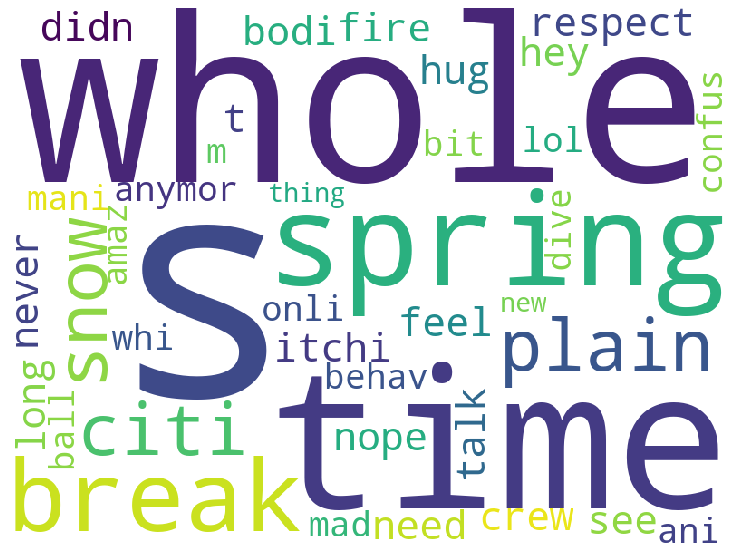

In [217]:
cloud(' '.join(X_train['clean']))

In [225]:
# a grid search cross validation example for LR with tfidf matrix
# but you can use sklearn pipe for grid search, so..
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

kfold = StratifiedKFold( n_splits = 5)
lr = LogisticRegression()

lr2_param = {
    'penalty':['l2'],
    'dual':[False],
    'C':[6],
    'class_weight':[{1:1}]
    }

lr_CV = GridSearchCV(lr, param_grid = [lr2_param], cv = kfold, scoring = 'roc_auc', n_jobs = 1, verbose = 1)
lr_CV.fit(train_tv, y_train)
print(lr_CV.best_params_)
logi_best = lr_CV.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 6, 'class_weight': {1: 1}, 'dual': False, 'penalty': 'l2'}


In [227]:
lr_CV.predict(test_tv)
print(lr_CV.best_score_)

0.65


In [256]:
# dictionary operation 
# sort key by value
# sort key by value (with tuple pairs)
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
x = {'a': 2, 'b': 4, 'c': 3, 'd': 1, 'e': 0}
new_x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse = True)}
new_x

{'b': 4, 'c': 3, 'a': 2, 'd': 1, 'e': 0}

In [257]:
# or
for k in sorted(x, key=x.get, reverse=True):
    print(k, x[k])

b 4
c 3
a 2
d 1
e 0


In [260]:
# find key with corresponding value list contains a certain value
my_dict = {'a': [6, 13], 'b': [7, 8, 9, 11, 13, 14], 'c': [6, 14], 'd': [6], 'e': [6], 'f': [6, 7], 'g': [6, 8]}
target_var = 6
new_dict = [k for k, v in my_dict.items() if target_var in v]
new_dict

['a', 'c', 'd', 'e', 'f', 'g']